In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

# EDA and Data Analysis

In [7]:
data_path = os.path.join("./", "./data/", "data_for_interview.csv")

try:
    df=pd.read_csv(data_path)
    df.head()
except Exception as e:
    print("File Can't be loaded", e)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106036 entries, 0 to 106035
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            106036 non-null  int64 
 1   user            106036 non-null  int64 
 2   source_prefix   106036 non-null  object
 3   source_postfix  106036 non-null  int64 
 4   dest_prefix     106036 non-null  object
 5   dest_postfix    106036 non-null  int64 
 6   agent           106036 non-null  object
 7   amount          106036 non-null  int64 
 8   status          106036 non-null  object
 9   label           106036 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 8.1+ MB


### We have a dataset consisting of 10 columns and 106,036 rows, with no null values in any of the columns, and the data types for each column are specified.

In [10]:
df.describe()

,date,user,source_postfix,dest_postfix,amount,label
count,1.060360e+05,106036.000000,106036.000000,106036.000000,1.060360e+05,106036.000000
mean,1.702000e+12,31195.855653,4999.744285,5002.915783,5.329680e+06,0.034771
std,3.498693e+08,14583.081300,2889.824627,2888.771782,9.148514e+06,0.183201
min,1.701376e+12,10000.000000,0.000000,0.000000,1.000000e+04,0.000000
25%,1.701698e+12,18529.000000,2500.000000,2494.000000,1.000000e+06,0.000000
50%,1.701989e+12,28727.500000,5011.000000,5019.000000,2.000000e+06,0.000000
75%,1.702304e+12,42430.250000,7496.250000,7463.000000,5.000000e+06,0.000000
max,1.702586e+12,62905.000000,9999.000000,9999.000000,5.000000e+07,1.000000


### General information about the numerical columns is observed. For example, the average, maximum, and minimum transaction amounts are identified.

In [5]:
df.isnull().sum()

date              0
user              0
source_prefix     0
source_postfix    0
dest_prefix       0
dest_postfix      0
agent             0
amount            0
status            0
label             0
dtype: int64

### To ensure that there are no null values in the dataset.

In [6]:
df.duplicated().sum()

0

### To ensure that there are no duplicated records in the dataset.

In [7]:
df.nunique()

date              106013
user               52906
source_prefix         27
source_postfix      9961
dest_prefix           34
dest_postfix        9988
agent                  4
amount              2372
status                 2
label                  2
dtype: int64

### The number of unique values in each column can be observed. This information can be helpful in various aspects, such as converting categorical data into numerical data.

In [11]:
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.head()

,date,user,source_prefix,source_postfix,dest_prefix,dest_postfix,agent,amount,status,label
0,2023-11-30 20:30:12.255,56757,Muffin,8267,Whiskers,4894,A,1000000,fail,0
1,2023-11-30 20:30:37.246,19858,Squiggle,4947,Flapjack,9555,A,50000000,success,0
2,2023-11-30 20:30:37.930,28303,Flapjack,8262,Squishy,566,C,2000000,success,0
3,2023-11-30 20:30:45.611,23031,Squeegee,5657,Muffin,4559,C,9110000,fail,0
4,2023-11-30 20:30:56.887,12391,Whiskers,1788,Snickerdoodle,9767,A,1000000,success,1


### Conversion of the date column format.

In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head()

,date,user,source_prefix,source_postfix,dest_prefix,dest_postfix,agent,amount,status,label,year,month,day,day_of_week,hour
0,2023-11-30 20:30:12.255,56757,Muffin,8267,Whiskers,4894,A,1000000,fail,0,2023,11,30,3,20
1,2023-11-30 20:30:37.246,19858,Squiggle,4947,Flapjack,9555,A,50000000,success,0,2023,11,30,3,20
2,2023-11-30 20:30:37.930,28303,Flapjack,8262,Squishy,566,C,2000000,success,0,2023,11,30,3,20
3,2023-11-30 20:30:45.611,23031,Squeegee,5657,Muffin,4559,C,9110000,fail,0,2023,11,30,3,20
4,2023-11-30 20:30:56.887,12391,Whiskers,1788,Snickerdoodle,9767,A,1000000,success,1,2023,11,30,3,20


### Extraction of more detailed time information for further analysis. As seen from the resulting data, the time data pertains to only one year, and most transactions were conducted in a single month.

In [10]:
df['label'].value_counts()

label
0    102349
1      3687
Name: count, dtype: int64

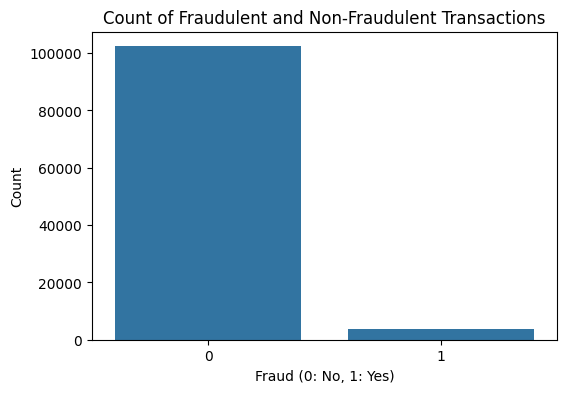

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

### Bar charts and pie charts clearly show that the dataset is imbalanced, as only 3.5% of the data belongs to category 1

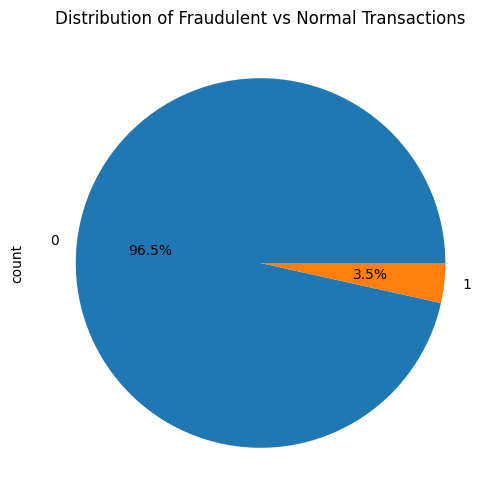

In [12]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Fraudulent vs Normal Transactions')
plt.show()

In [13]:
user_transaction_sums = df.groupby('user')['amount'].sum().reset_index()
user_transaction_sums.sort_values(by='amount',ascending=False).head(10)

,user,amount
2946,12946,913000000
5767,15767,678440000
2398,12398,525000000
17043,27043,450000000
1369,11369,420000000
22848,32848,413800000
12735,22735,389000000
6397,16397,340000000
7542,17542,314100000
100,10100,314000000


### The total amounts each user transacted across all their transactions are specified. It is evident that user 12946 has the highest transaction volume.

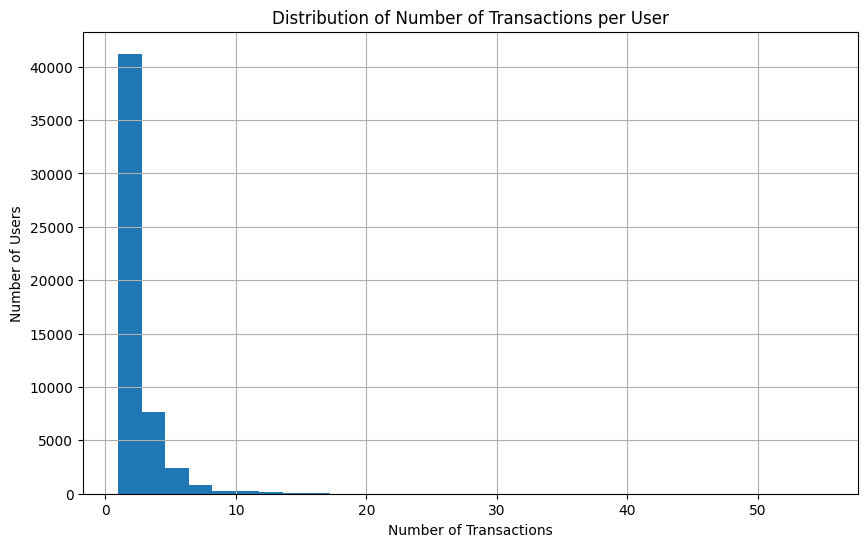

In [15]:
user_transactions = df.groupby('user').size()
plt.figure(figsize=(10, 6))
user_transactions.hist(bins=30)
plt.title('Distribution of Number of Transactions per User')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Users')
plt.show()

### The chart shows the distribution of user transactions. It can be inferred from the chart that most users have made fewer than 10 transactions.


In [58]:
top_users = user_transactions[user_transactions > user_transactions.quantile(0.99)]
print(f'Top Users with Unusual Transaction Counts: {top_users}')

Top Users with Unusual Transaction Counts: user
10019    12
10034    13
10046    11
10048    25
10054    12
         ..
34185    10
34593    10
35519    11
38264    11
40165    10
Length: 506, dtype: int64


### Users whose number of transactions significantly differs from the others are identified.

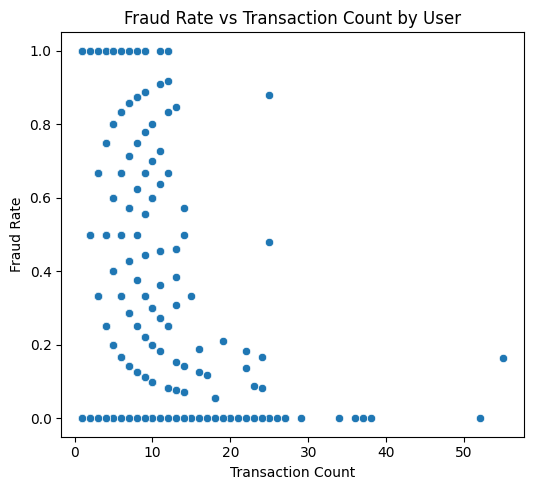

In [17]:
user_stats = df.groupby('user').agg({
    'amount': ['count', 'mean', 'std'],
    'label': 'mean'
}).reset_index()
user_stats.columns = ['user', 'transaction_count', 'avg_amount', 'std_amount', 'fraud_rate']
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='transaction_count', y='fraud_rate', data=user_stats)
plt.title('Fraud Rate vs Transaction Count by User')
plt.xlabel('Transaction Count')
plt.ylabel('Fraud Rate')

plt.tight_layout()
plt.show()

### The following chart shows the distribution of fraud rates based on the number of transactions made by users. One notable observation is that users with a significantly higher number of transactions than others have a lower fraud rate.

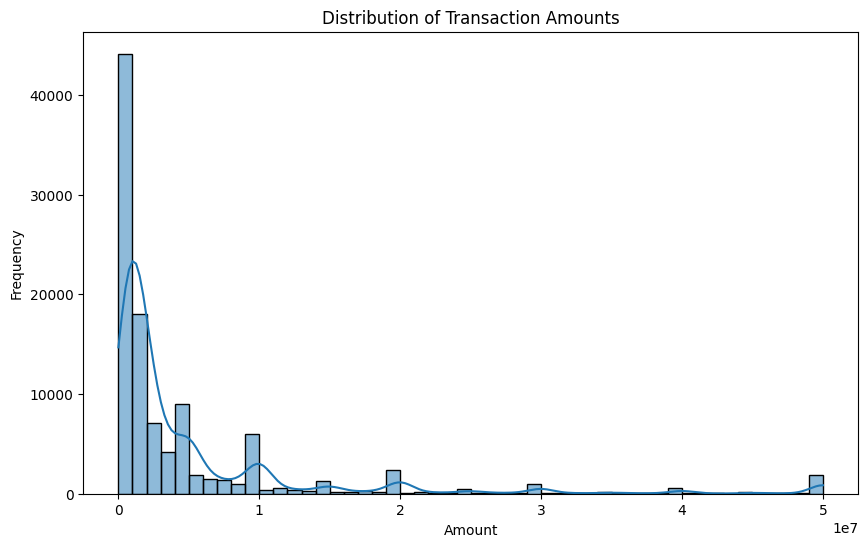

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### The chart shows the distribution of transaction amounts. It is evident from the chart that most transactions are of low amounts.

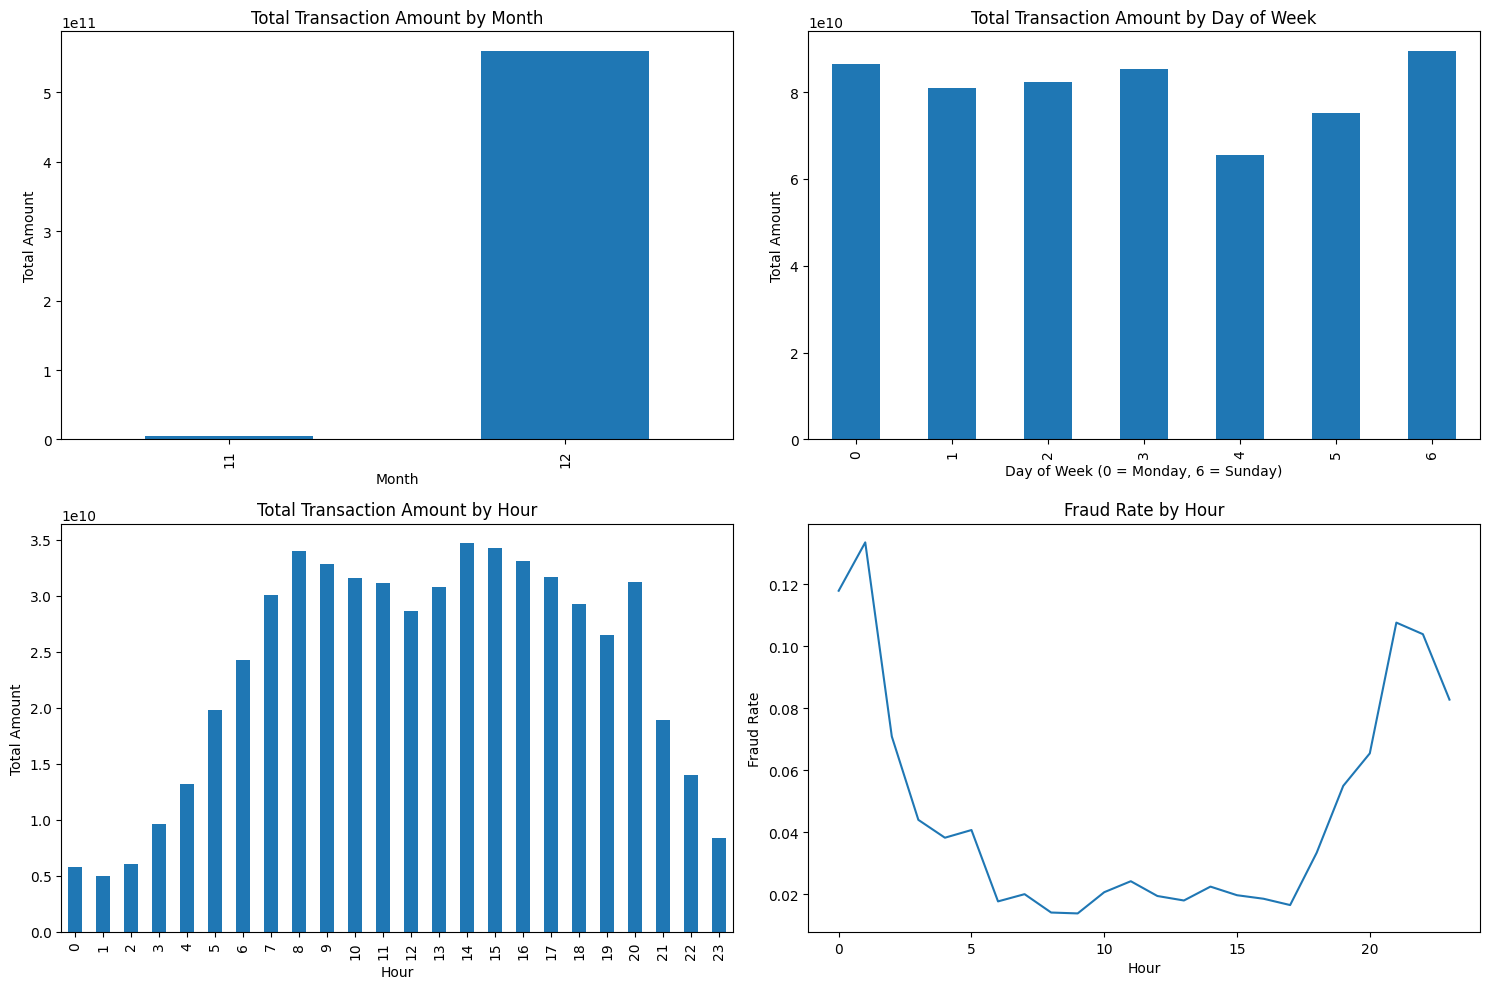

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df.groupby('month')['amount'].sum().plot(kind='bar')
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.subplot(2, 2, 2)
df.groupby('day_of_week')['amount'].sum().plot(kind='bar')
plt.title('Total Transaction Amount by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Total Amount')
plt.subplot(2, 2, 3)
df.groupby('hour')['amount'].sum().plot(kind='bar')
plt.title('Total Transaction Amount by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.subplot(2, 2, 4)
df.groupby('hour')['label'].mean().plot(kind='line')
plt.title('Fraud Rate by Hour')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

### The following charts illustrate the total transaction amounts across different categories, such as month, day of the week, hour, and fraud rate at different hours. As previously mentioned, most transactions occurred in one month. Additionally, only the fourth day of the week shows a significant difference compared to other days. The analysis of transaction hours reveals that transactions peak at around 8 AM and 2 PM, while fraud rates are notably high at 1 AM and 9 PM.

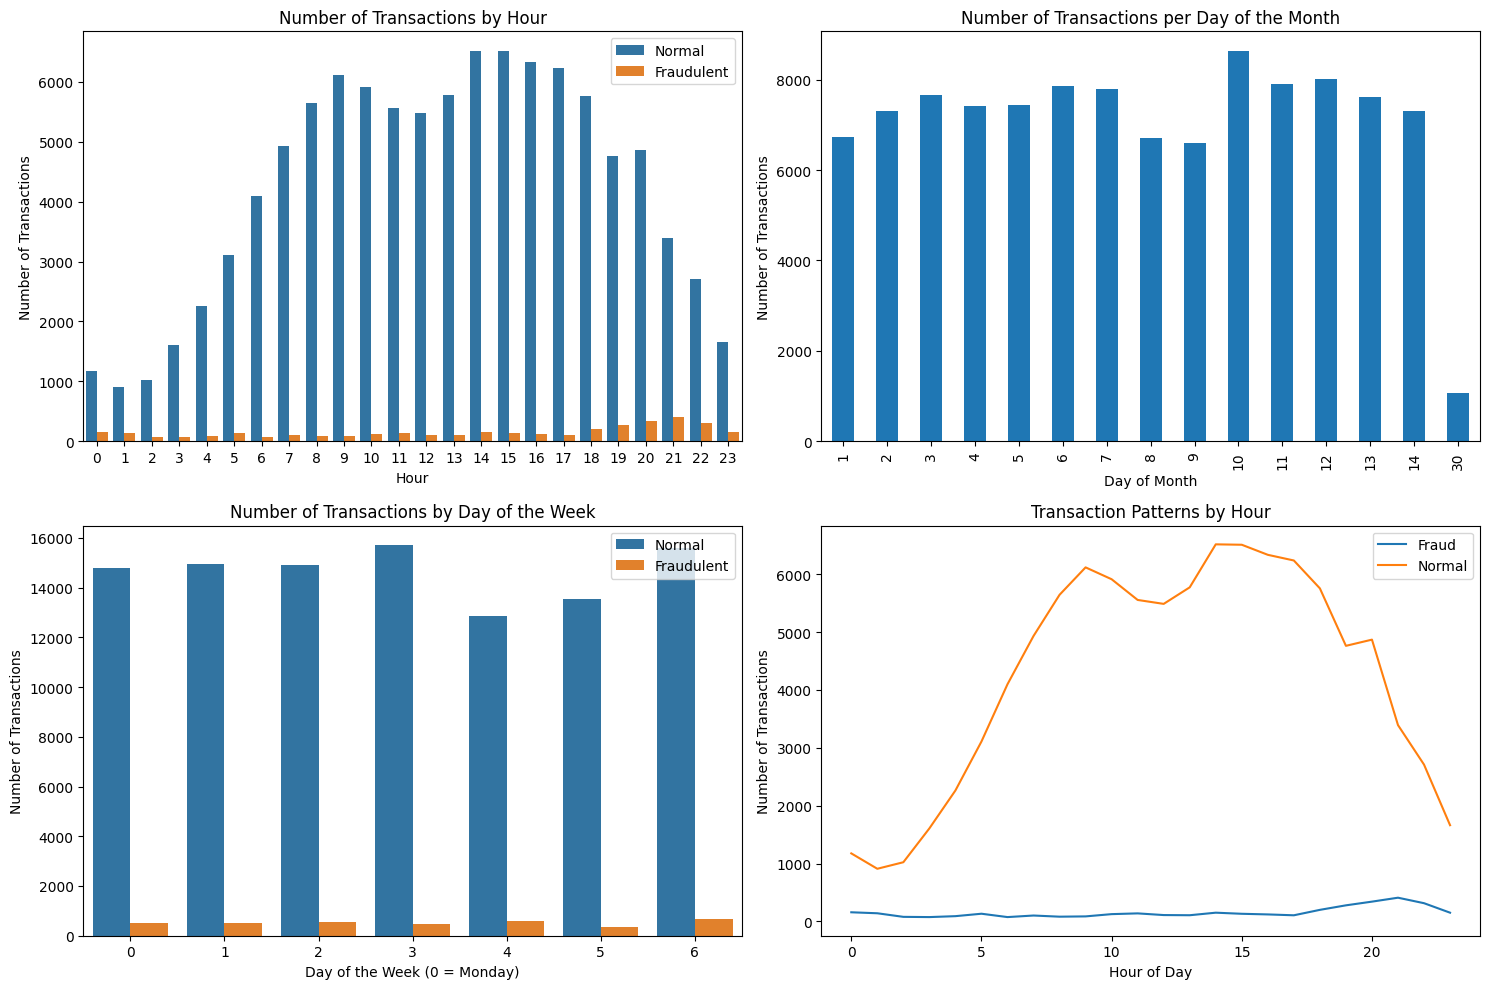

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='hour', data=df, hue='label', ax=axs[0, 0])
axs[0, 0].set_title('Number of Transactions by Hour')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Number of Transactions')
axs[0, 0].legend(['Normal', 'Fraudulent'])
daily_transactions = df.groupby('day').size()
daily_transactions.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Number of Transactions per Day of the Month')
axs[0, 1].set_xlabel('Day of Month')
axs[0, 1].set_ylabel('Number of Transactions')
sns.countplot(x='day_of_week', data=df, hue='label', ax=axs[1, 0])
axs[1, 0].set_title('Number of Transactions by Day of the Week')
axs[1, 0].set_xlabel('Day of the Week (0 = Monday)')
axs[1, 0].set_ylabel('Number of Transactions')
axs[1, 0].legend(['Normal', 'Fraudulent'])
fraud_hourly = df[df['label'] == 1]['hour'].value_counts().sort_index()
normal_hourly = df[df['label'] == 0]['hour'].value_counts().sort_index()
axs[1, 1].plot(fraud_hourly.index, fraud_hourly.values, label='Fraud')
axs[1, 1].plot(normal_hourly.index, normal_hourly.values, label='Normal')
axs[1, 1].set_title('Transaction Patterns by Hour')
axs[1, 1].set_xlabel('Hour of Day')
axs[1, 1].set_ylabel('Number of Transactions')
axs[1, 1].legend()
plt.tight_layout()
plt.show()

### The following charts provide insights, including the observation that although previous charts highlighted certain hours with higher fraud rates, it is important to note that there are significantly fewer transactions during these hours compared to others. Moreover, while normal transactions exhibit a fluctuating pattern throughout the day, suspicious transactions tend to follow a consistent pattern.

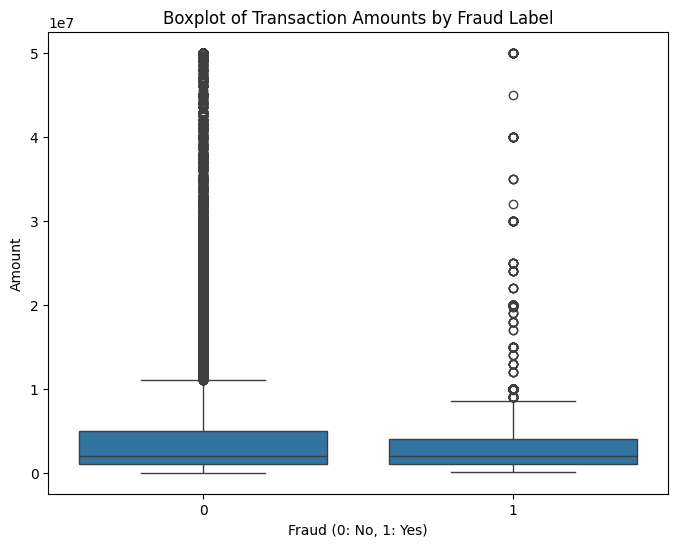

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='amount', data=df)
plt.title('Boxplot of Transaction Amounts by Fraud Label')
plt.xlabel('Fraud (0: No, 1: Yes)')
plt.ylabel('Amount')
plt.show()

### The boxplot illustrates the distribution of transaction amounts based on whether the transaction is labeled as fraud (1) or not (0). The boxplot shows that fraudulent transactions (1) tend to have a wider range of amounts, including some outliers at higher amounts, compared to non-fraudulent transactions (0). The median transaction amount for fraudulent transactions appears slightly higher than for non-fraudulent ones, and the presence of outliers in both categories indicates a variance in transaction amounts. This suggests that while fraudulent transactions can occur at varying amounts, there are still some distinctions in the distributions compared to normal transactions

In [42]:
high_value_transactions = df[df['amount'] > df['amount'].quantile(0.95)]
low_value_transactions = df[df['amount'] < df['amount'].quantile(0.05)]
print(f'High Value Transactions: {len(high_value_transactions)}')
print(f'Low Value Transactions: {len(low_value_transactions)}')

High Value Transactions: 5290
Low Value Transactions: 4163


### The number of transactions with amounts significantly lower or higher than the majority of the data has been identified.

In [43]:
suspicious_transactions = df[(df['amount'] > df['amount'].quantile(0.95)) & (df['label'] == 1)]
print(f'Suspicious Transactions: {suspicious_transactions}')

Suspicious Transactions:                          date   user  source_prefix  source_postfix  \
1292  2023-12-01 01:51:12.552  12364       Whiskers            8433   
3618  2023-12-01 11:39:23.182  12178        Pancake            7666   
8167  2023-12-02 04:23:58.029  12299         Noodle            4946   
11622 2023-12-02 14:01:16.723  12279       Flapjack            5470   
12530 2023-12-02 15:56:08.725  10662  Snickerdoodle             351   
...                       ...    ...            ...             ...   
91625 2023-12-13 05:10:21.701  10120       Whiskers             609   
95185 2023-12-13 14:26:48.248  10102       Whiskers            4841   
98608 2023-12-13 23:10:38.221  10038        Squishy            9402   
98612 2023-12-13 23:11:13.369  10038        Squishy            9402   
98615 2023-12-13 23:12:04.820  10038        Squishy            9402   

         dest_prefix  dest_postfix agent    amount   status  label  year  \
1292   Snickerdoodle          3872     A  3000

### For example, transactions involving fraud with amounts significantly higher than most of the data have been detailed with complete information.

In [44]:
categorical_columns = ['source_prefix', 'dest_prefix', 'agent', 'status']
for col in categorical_columns:
    print(f"\nAnalysis for {col}:")
    print(df.groupby(col)['label'].mean().sort_values(ascending=False))


Analysis for source_prefix:
source_prefix
Dizzy            0.114754
Beanie           0.058824
Whiskers         0.051558
Fiddlesticks     0.046468
Squishy          0.043395
Squiggle         0.041123
Snickerdoodle    0.034832
Pancake          0.033783
Noodle           0.032446
Squeegee         0.032265
Cheesepuff       0.031894
Muffin           0.026891
Toodles          0.025000
Gizmo            0.020744
Marshmallow      0.018692
Chuckles         0.018557
Pudding          0.016194
Boomer           0.012750
Schnitzel        0.011780
Flapjack         0.011213
Bubbles          0.010522
Tater            0.010101
Biscuit          0.009752
Twinkles         0.009276
Bacon            0.009259
Sprinkles        0.002395
Peaches          0.000000
Name: label, dtype: float64

Analysis for dest_prefix:
dest_prefix
Buttercup        0.382931
Pickle           0.294118
Noodle           0.120099
Snickerdoodle    0.098775
Pancake          0.064060
Waffles          0.058174
Bubbles          0.036068
Squeeg

### The fraud rate for categorical data has been specified. As seen, the fraud rate for the source_prefix "Dizzy" is higher. In contrast, in the dest_prefix category, "Buttercup" has the highest fraud rate. Additionally, agency "B" has the highest fraud rate, and there is no significant difference between successful and failed transactions in terms of fraud rate, although the rate is higher for failed transactions. This information is visualized in four separate charts.

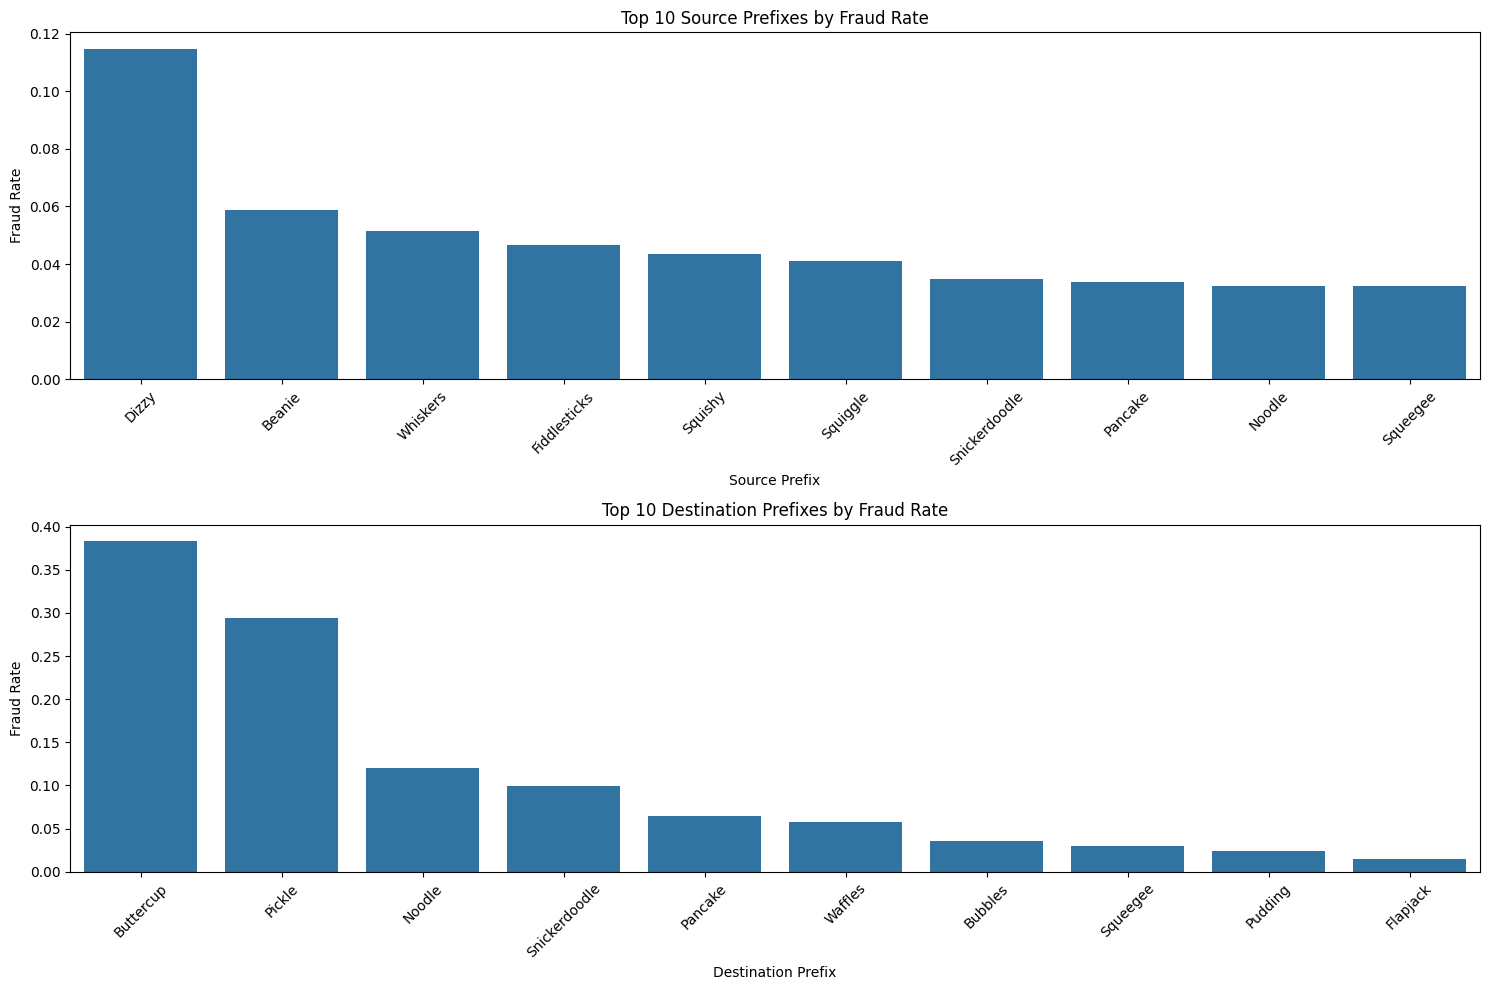

In [45]:
source_stats = df.groupby('source_prefix').agg({
    'amount': ['count', 'mean'],
    'label': 'mean'
}).reset_index()
source_stats.columns = ['source_prefix', 'transaction_count', 'avg_amount', 'fraud_rate']
source_stats = source_stats.sort_values('fraud_rate', ascending=False).head(10)

dest_stats = df.groupby('dest_prefix').agg({
    'amount': ['count', 'mean'],
    'label': 'mean'
}).reset_index()
dest_stats.columns = ['dest_prefix', 'transaction_count', 'avg_amount', 'fraud_rate']
dest_stats = dest_stats.sort_values('fraud_rate', ascending=False).head(10)
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='source_prefix', y='fraud_rate', data=source_stats)
plt.title('Top 10 Source Prefixes by Fraud Rate')
plt.xlabel('Source Prefix')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(x='dest_prefix', y='fraud_rate', data=dest_stats)
plt.title('Top 10 Destination Prefixes by Fraud Rate')
plt.xlabel('Destination Prefix')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### The fraud rate for categorical data has been specified. As seen, the fraud rate for the source_prefix "Dizzy" is higher. In contrast, in the dest_prefix category, "Buttercup" has the highest fraud rate. Additionally, agency "B" has the highest fraud rate, and there is no significant difference between successful and failed transactions in terms of fraud rate, although the rate is higher for failed transactions. This information is visualized in four separate charts.

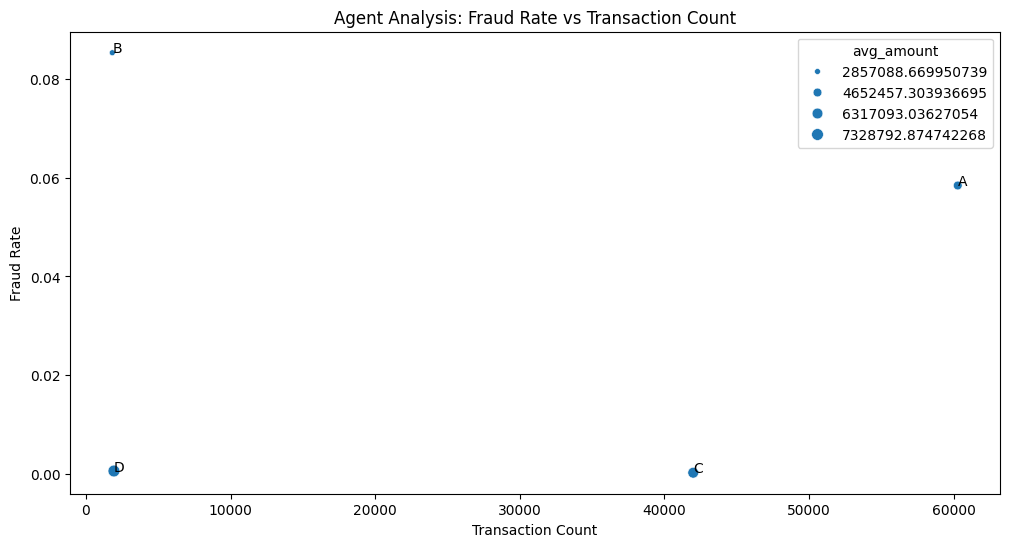

In [46]:
agent_stats = df.groupby('agent').agg({
    'amount': ['count', 'mean'],
    'label': 'mean'
}).reset_index()
agent_stats.columns = ['agent', 'transaction_count', 'avg_amount', 'fraud_rate']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='transaction_count', y='fraud_rate', size='avg_amount', data=agent_stats)
plt.title('Agent Analysis: Fraud Rate vs Transaction Count')
plt.xlabel('Transaction Count')
plt.ylabel('Fraud Rate')
for i, row in agent_stats.iterrows():
    plt.annotate(row['agent'], (row['transaction_count'], row['fraud_rate']))
plt.show()

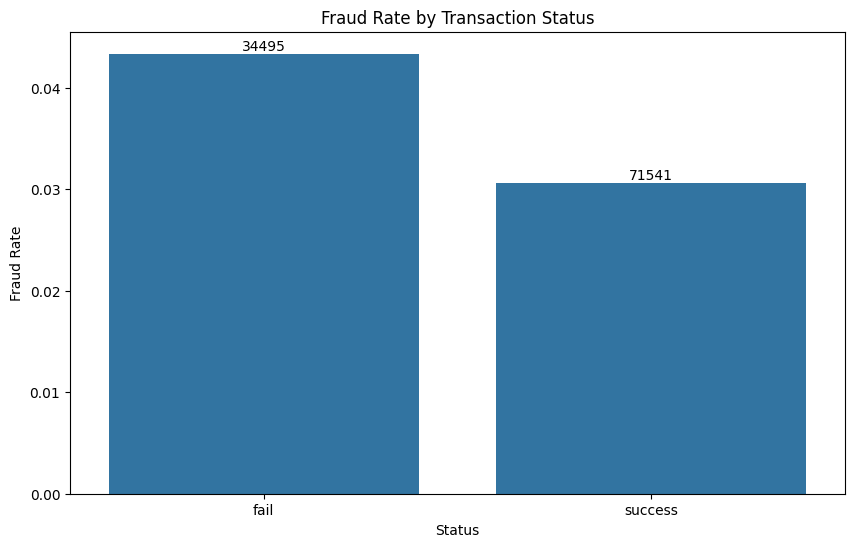

In [47]:
status_stats = df.groupby('status').agg({
    'amount': ['count', 'mean'],
    'label': 'mean'
}).reset_index()
status_stats.columns = ['status', 'transaction_count', 'avg_amount', 'fraud_rate']
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='fraud_rate', data=status_stats)
plt.title('Fraud Rate by Transaction Status')
plt.xlabel('Status')
plt.ylabel('Fraud Rate')
for i, row in status_stats.iterrows():
    plt.text(i, row['fraud_rate'], f"{row['transaction_count']}", ha='center', va='bottom')
plt.show()

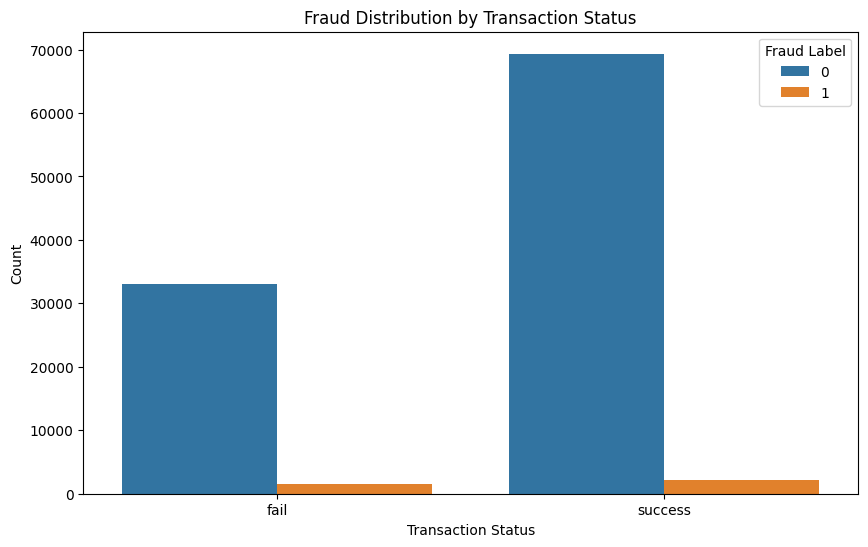

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='status', hue='label', data=df)
plt.title('Fraud Distribution by Transaction Status')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
plt.legend(title='Fraud Label')
plt.show()

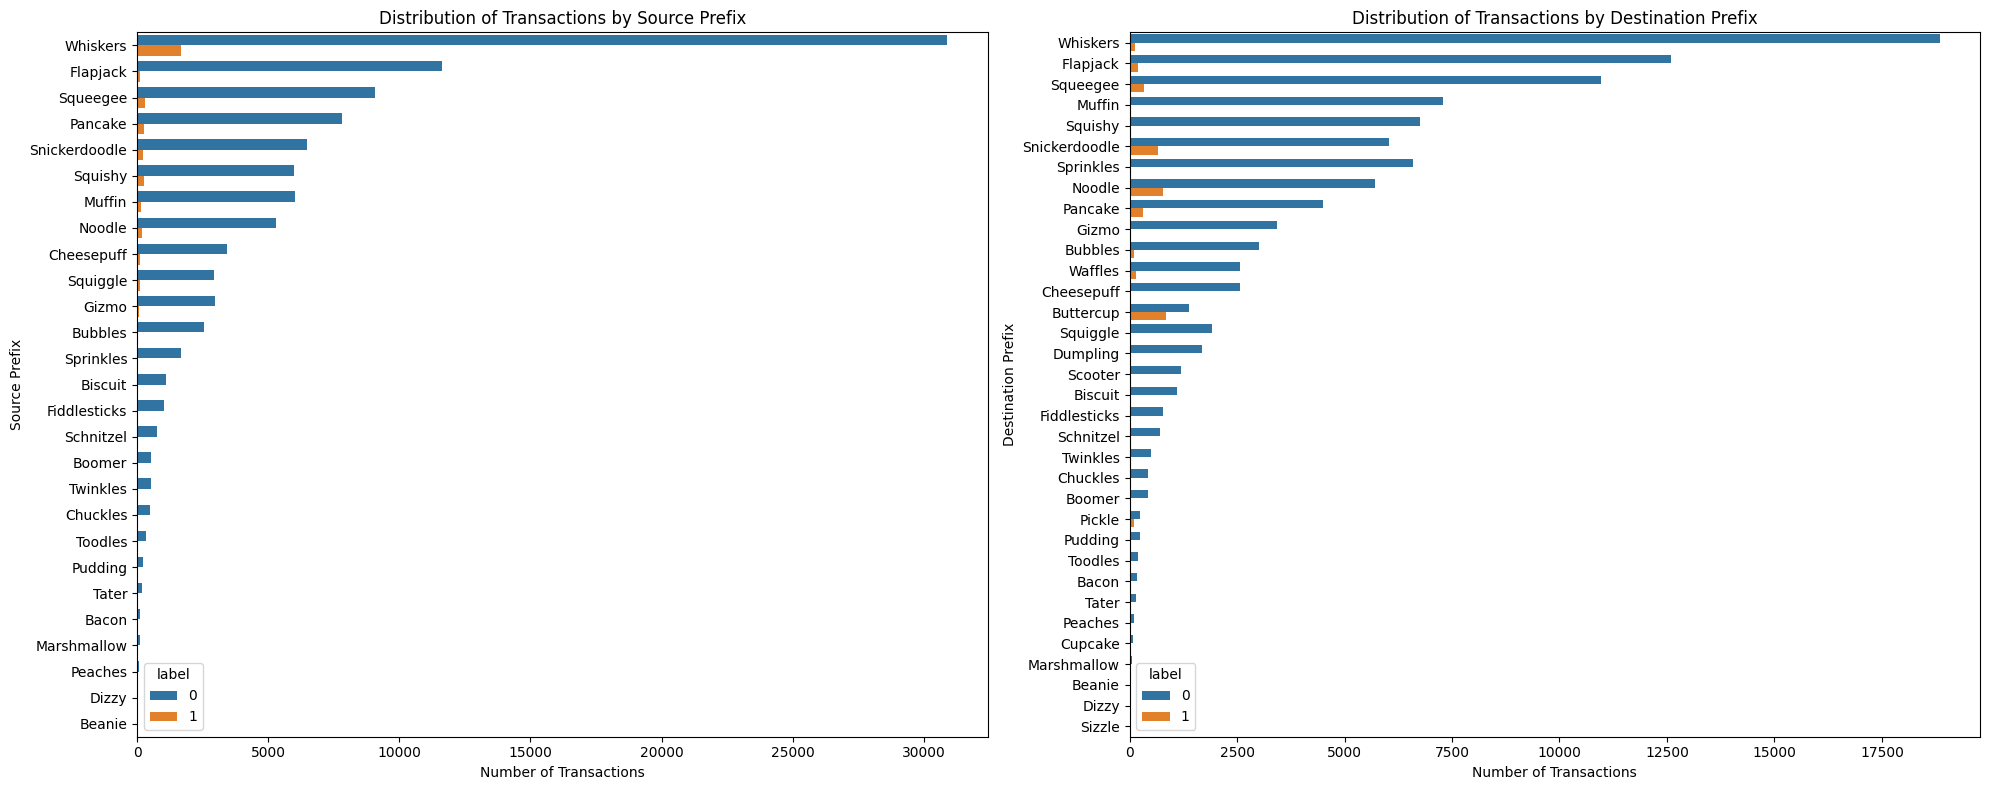

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(y='source_prefix', data=df, hue='label', order=df['source_prefix'].value_counts().index, ax=axs[0])
axs[0].set_title('Distribution of Transactions by Source Prefix')
axs[0].set_xlabel('Number of Transactions')
axs[0].set_ylabel('Source Prefix')
sns.countplot(y='dest_prefix', data=df, hue='label', order=df['dest_prefix'].value_counts().index, ax=axs[1])
axs[1].set_title('Distribution of Transactions by Destination Prefix')
axs[1].set_xlabel('Number of Transactions')
axs[1].set_ylabel('Destination Prefix')
plt.tight_layout()
plt.show()

### The following charts show the distribution of transactions by dest_prefix and source_prefix. A notable point is that although "Dizzy" was previously noted to have the highest rate, in this section, the number of fraud cases and total transactions is much lower compared to "Whiskers." In contrast, in the dest_prefix category, the number of transactions is relatively high, as is the fraud rate.

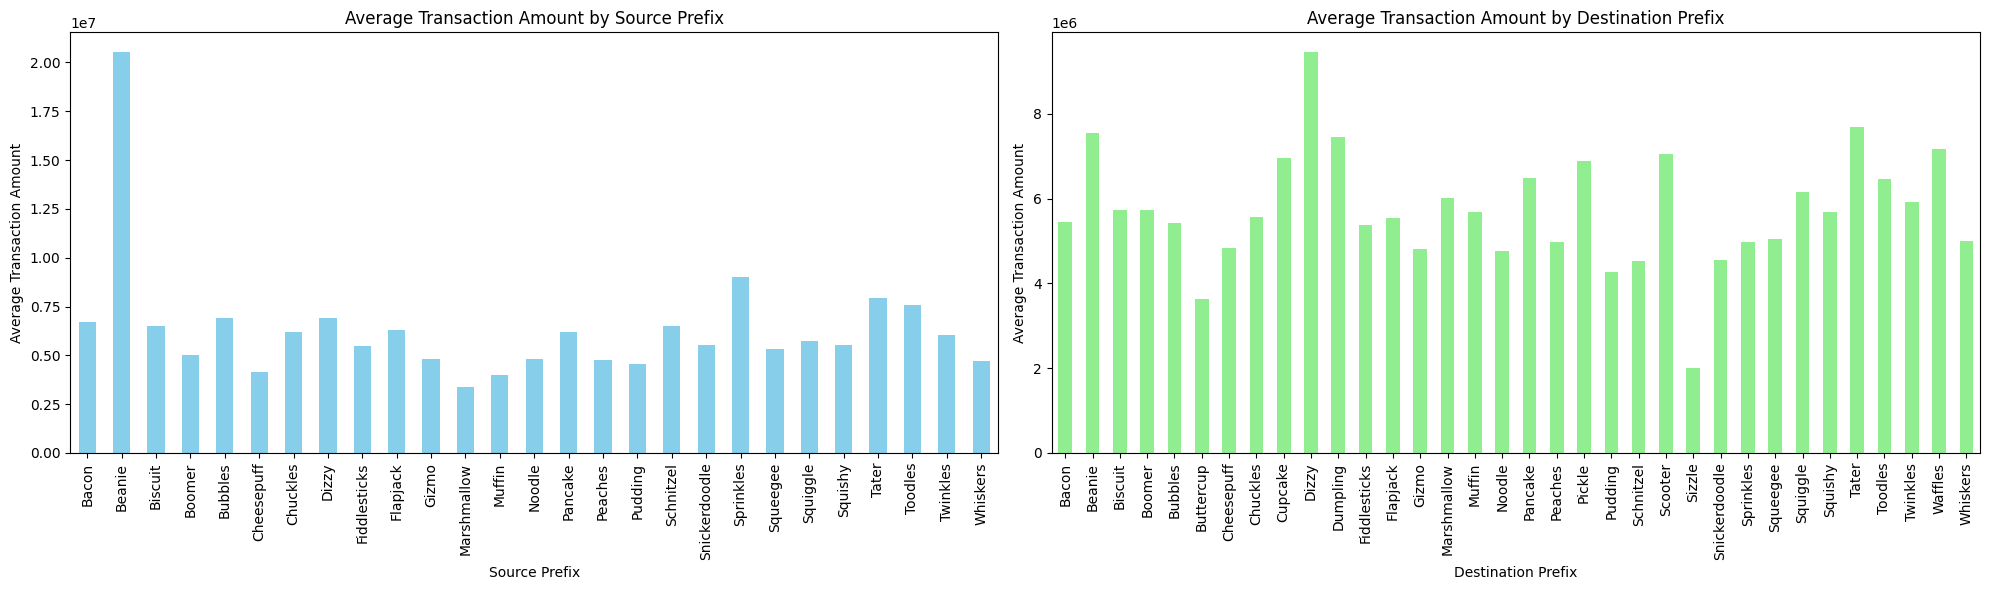

In [50]:
mean_amount_by_source = df.groupby('source_prefix')['amount'].mean()
mean_amount_by_dest = df.groupby('dest_prefix')['amount'].mean()
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
mean_amount_by_source.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Average Transaction Amount by Source Prefix')
axs[0].set_xlabel('Source Prefix')
axs[0].set_ylabel('Average Transaction Amount')
mean_amount_by_dest.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Average Transaction Amount by Destination Prefix')
axs[1].set_xlabel('Destination Prefix')
axs[1].set_ylabel('Average Transaction Amount')
plt.tight_layout()
plt.show()


### The following charts indicate the transaction amounts for dest_prefix and source_prefix. The charts demonstrate that although the number of transactions may be higher in certain dest_prefix and source_prefix categories, the ranking differs based on the numerical amount of transactions.

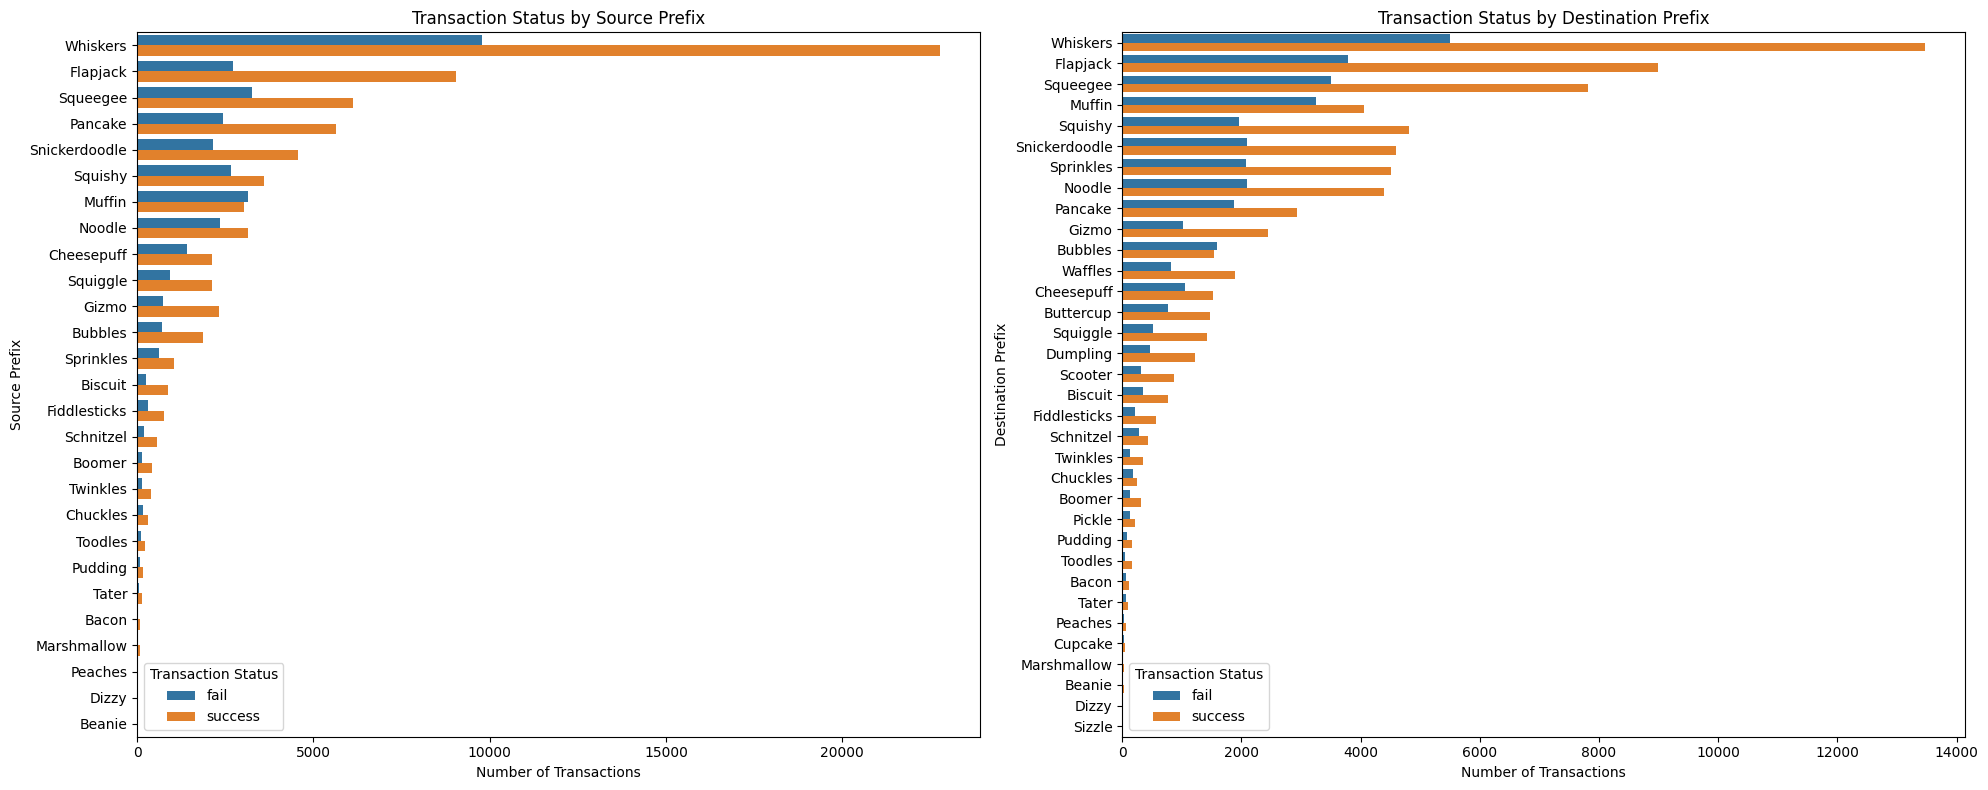

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(y='source_prefix', hue='status', data=df, order=df['source_prefix'].value_counts().index, ax=axs[0])
axs[0].set_title('Transaction Status by Source Prefix')
axs[0].set_xlabel('Number of Transactions')
axs[0].set_ylabel('Source Prefix')
axs[0].legend(title='Transaction Status')
sns.countplot(y='dest_prefix', hue='status', data=df, order=df['dest_prefix'].value_counts().index, ax=axs[1])
axs[1].set_title('Transaction Status by Destination Prefix')
axs[1].set_xlabel('Number of Transactions')
axs[1].set_ylabel('Destination Prefix')
axs[1].legend(title='Transaction Status')
plt.tight_layout()
plt.show()


### An important observation from these two charts is that in most categories, successful operations outnumber unsuccessful ones, although in some categories, the difference between the two is minimal.

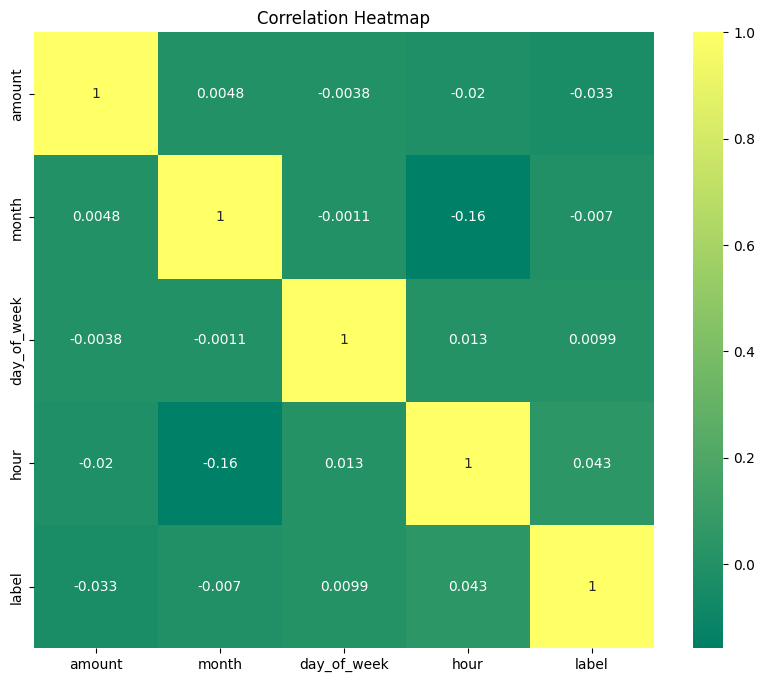

In [63]:
correlation_matrix = df[['amount', 'month', 'day_of_week', 'hour', 'label']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='summer')
plt.title('Correlation Heatmap')
plt.show()

### The chart below shows that the specified numerical data in the correlation chart does not have a significant correlation with the label column that can be used for analysis alone.

In [55]:
print("T-test for amount between fraudulent and normal transactions:")
fraud_amounts = df[df['label'] == 1]['amount']
normal_amounts = df[df['label'] == 0]['amount']
t_stat, p_value = stats.ttest_ind(fraud_amounts, normal_amounts)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print("\nChi-square test for independence between status and fraud:")
contingency_table = pd.crosstab(df['status'], df['label'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p_value}")

T-test for amount between fraudulent and normal transactions:
T-statistic: -10.637685814661623, P-value: 2.052153299307749e-26

Chi-square test for independence between status and fraud:
Chi-square statistic: 111.46377414108109, P-value: 4.682843411559075e-26


### The results indicate a statistically significant difference in transaction amounts between fraudulent and non-fraudulent transactions, and a notable correlation between transaction status and the likelihood of fraud.

In [13]:
df.head()

,date,user,source_prefix,source_postfix,dest_prefix,dest_postfix,agent,amount,status,label,year,month,day,day_of_week,hour
0,2023-11-30 20:30:12.255,56757,Muffin,8267,Whiskers,4894,A,1000000,fail,0,2023,11,30,3,20
1,2023-11-30 20:30:37.246,19858,Squiggle,4947,Flapjack,9555,A,50000000,success,0,2023,11,30,3,20
2,2023-11-30 20:30:37.930,28303,Flapjack,8262,Squishy,566,C,2000000,success,0,2023,11,30,3,20
3,2023-11-30 20:30:45.611,23031,Squeegee,5657,Muffin,4559,C,9110000,fail,0,2023,11,30,3,20
4,2023-11-30 20:30:56.887,12391,Whiskers,1788,Snickerdoodle,9767,A,1000000,success,1,2023,11,30,3,20


In [15]:
df.drop(['date','source_postfix','dest_postfix','year','month','day','day_of_week'],axis=1, inplace= True)

In [17]:
df.drop('user',axis=1,inplace=True)

### Columns from the dataset that have been determined to have no significant impact on determining the fraud rate, based on the analyses conducted so far, will be removed to prepare the final dataset for analysis.

In [18]:
df.head()

,source_prefix,dest_prefix,agent,amount,status,label,hour
0,Muffin,Whiskers,A,1000000,fail,0,20
1,Squiggle,Flapjack,A,50000000,success,0,20
2,Flapjack,Squishy,C,2000000,success,0,20
3,Squeegee,Muffin,C,9110000,fail,0,20
4,Whiskers,Snickerdoodle,A,1000000,success,1,20


In [20]:
output_path = r'C:\Users\ali\Desktop\Task\data\modified_dataset.csv'
df.to_csv(output_path, index=False)

### Storage of the final dataset